# LEVEL 3

### Task 1: Predictive Modeling
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g. linear regression, decision trees, random forest) and compare their performance

### Task 2: Customer Preference Analysis
- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

### Task 3: Data Visualization
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
final = pd.read_csv('data.csv')

In [15]:
final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
final.shape

(9551, 21)

In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Task 1: Predictive Modeling

#### Build a regression model to predict the aggregate rating of a restaurant based on available features. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [26]:
final = pd.get_dummies(final , columns=['Has Table booking' , 'Has Online delivery'] , drop_first=True)
# Converted categorical to numerical
final.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),No,No,3,4.8,Dark Green,Excellent,314,True,False


In [29]:
# selecting features for X and y
X = final[['Average Cost for two' , 'Price range' , 'Votes' , 'Has Table booking_Yes' , 'Has Online delivery_Yes']]
y = final['Aggregate rating']

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=50)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train , y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [37]:
print("MAE: " , mean_absolute_error(y_test , y_pred))
print("MSE: " , mean_squared_error(y_test , y_pred))
print("R2: " , r2_score(y_test , y_pred))

MAE:  1.0787249309165776
MSE:  1.6871690618600037
R2:  0.28802637050093627


#### Experiment with different algorithms (e.g. linear regression, decision trees, random forest) and compare their performance

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
mod = {
    "linear regression" : LinearRegression(),
    "decision trees" : DecisionTreeRegressor(),
    "random forest" : RandomForestRegressor()
}

result = {}

for name , mod in mod.items():
    mod.fit(X_train , y_train)
    y_pred = mod.predict(X_test)
    MAE = mean_absolute_error(y_test , y_pred)
    MSE = mean_squared_error(y_test , y_pred)
    r2 = r2_score(y_test , y_pred)
    
    result[name] = {"MAE": MAE , "MSE": MSE , "R2_Score": r2}

a = pd.DataFrame(result)
print(a)

          linear regression  decision trees  random forest
MAE                1.078725        0.302722       0.247942
MSE                1.687169        0.218086       0.142888
R2_Score           0.288026        0.907969       0.939702


**So we can conclude that random Forest is showing the best results in them**

## Task 2: Customer Preference Analysis

#### Analyze the relationship between the type of cuisine and the restaurant's rating.

In [40]:
cuisine = final['Cuisines']

In [43]:
cuisine.value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1826, dtype: int64

In [44]:
top_10 = cuisine.value_counts().head(10).index

In [45]:
rating = pd.DataFrame({"Cuisines" : cuisine , "Rating" : final['Aggregate rating']})  #taking cuisines and ratings

In [46]:
rating_top_10 = rating[rating['Cuisines'].isin(top_10)]

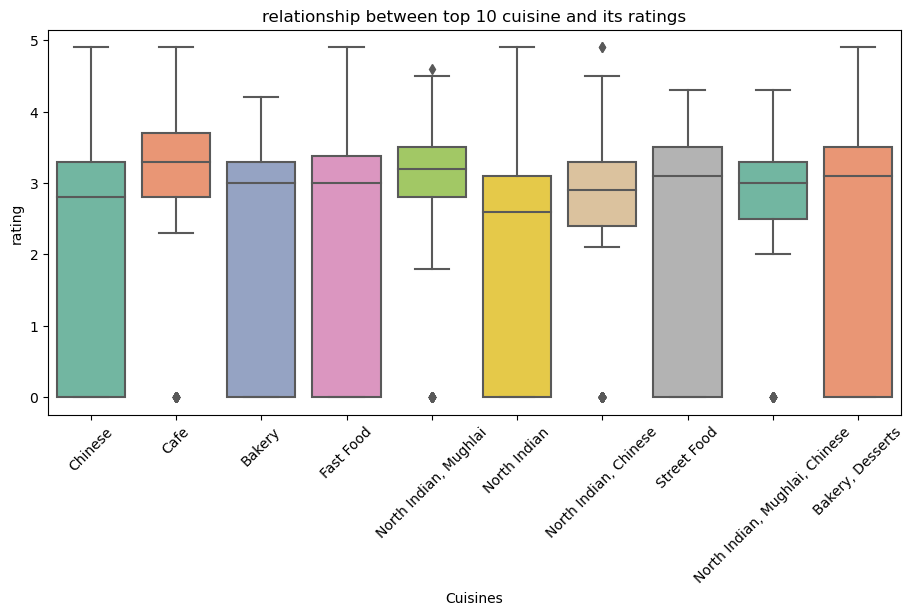

In [57]:
# box plot
plt.figure(figsize=(11,5))

sns.boxplot(x=rating_top_10['Cuisines'], y=rating_top_10['Rating'] , data= rating_top_10 , palette='Set2')
plt.title("relationship between top 10 cuisine and its ratings")
plt.xlabel("Cuisines")
plt.ylabel("rating")
plt.xticks(rotation=45)
plt.show()

#### Identify the most popular cuisines among customers based on the number of votes.

In [58]:
vote = pd.DataFrame({"Cuisines" : cuisine , "Votes" : final['Votes']})

In [59]:
vote_sum = vote.groupby('Cuisines')['Votes'].sum()

In [60]:
# Sort cuisine based on total votes in decsending order
popular = vote_sum.sort_values(ascending=False)

In [63]:
print("Top 10 popular Cuisines based on votes: " , popular.head(10))

Top 10 popular Cuisines based on votes:  Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


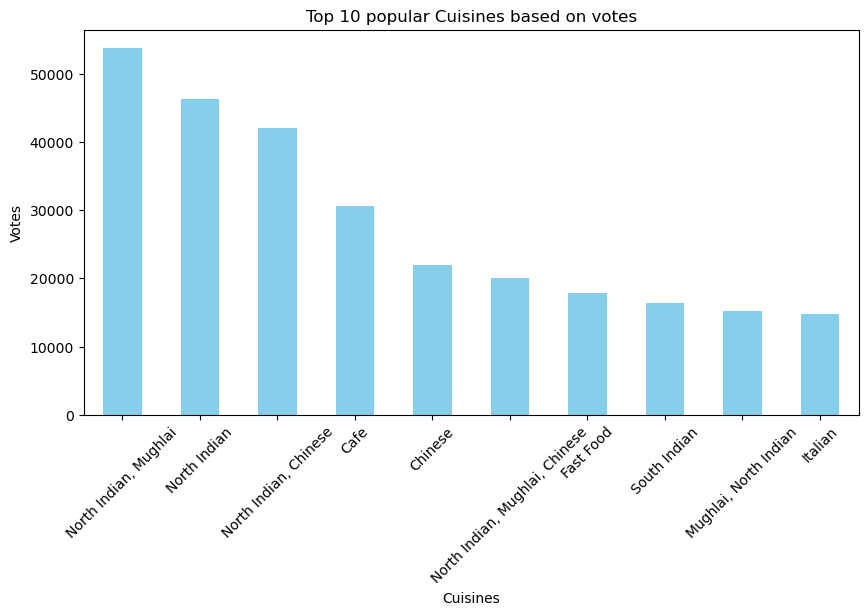

In [65]:
#bar plot
plt.figure(figsize=(10,5))

popular.head(10).plot(kind="bar" , color="skyblue")
plt.title("Top 10 popular Cuisines based on votes")
plt.xlabel("Cuisines")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()

#### Determine if there are any specific cuisines that tend to receive higher ratings.

In [66]:
cuisine_rating = pd.DataFrame({"Cuisines" : cuisine , "Rating" : final['Aggregate rating']})

In [68]:
avg_rating_of_cuisine = cuisine_rating.groupby('Cuisines')['Rating'].mean()

In [69]:
sorted_avg_rating_of_cuisine = avg_rating_of_cuisine.sort_values(ascending=False)

In [70]:
print("Top 10 Cuisines with heighest average rating: " , sorted_avg_rating_of_cuisine.head(10))

Top 10 Cuisines with heighest average rating:  Cuisines
Continental, Indian             4.9
BBQ, Breakfast, Southern        4.9
Italian, Deli                   4.9
American, Caribbean, Seafood    4.9
Burger, Bar Food, Steak         4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
American, Coffee and Tea        4.9
Name: Rating, dtype: float64


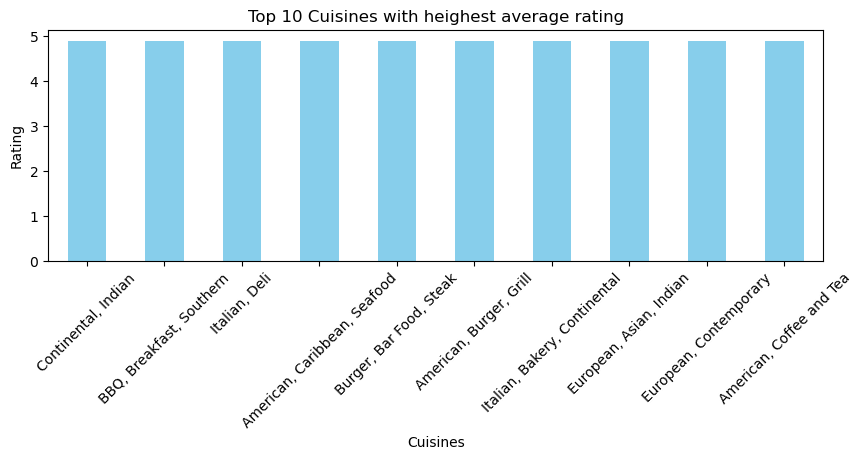

In [74]:
# bar plot
plt.figure(figsize=(10,3))

sorted_avg_rating_of_cuisine.head(10).plot(kind="bar" , color="skyblue")
plt.title("Top 10 Cuisines with heighest average rating")
plt.xlabel("Cuisines")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

## Task 3: Data Visualization

#### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc).

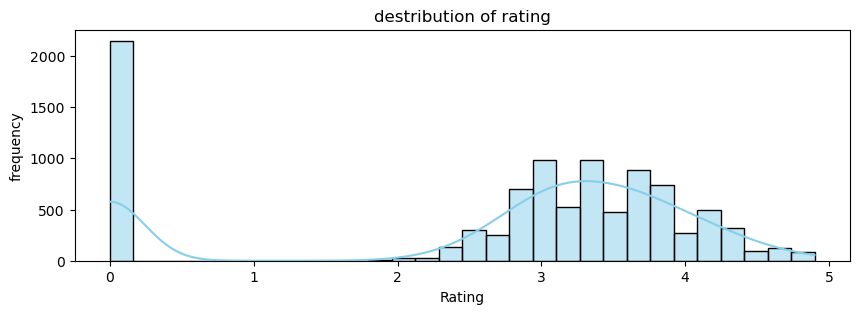

In [82]:
# histogram
plt.figure(figsize=(10,3))

sns.histplot(final['Aggregate rating'] , bins=30 , kde=True , color="skyblue")
plt.title("destribution of rating")
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.show()

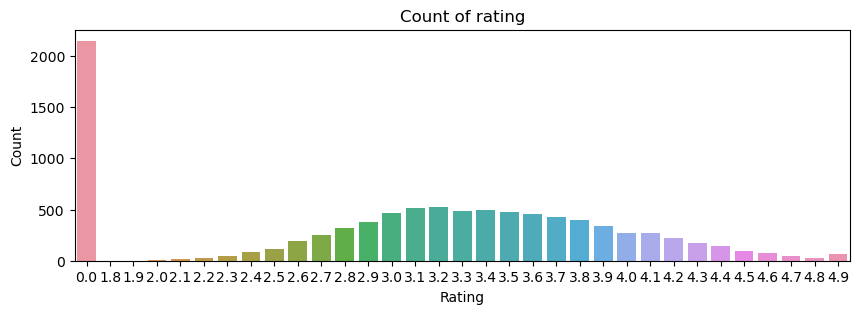

In [84]:
# Count plot
plt.figure(figsize=(10,3))

sns.countplot(x='Aggregate rating' , data=final)
plt.title("Count of rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

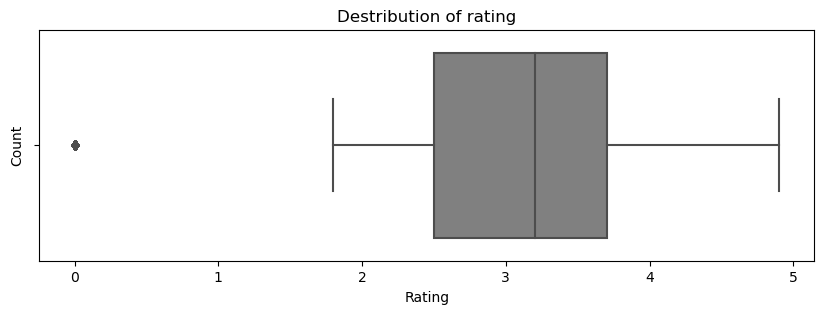

In [88]:
# Box plot
plt.figure(figsize=(10,3))

sns.boxplot(x='Aggregate rating' , data=final , color='grey')
plt.title("Destribution of rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [102]:
avg_rating_of_cuisines = final.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

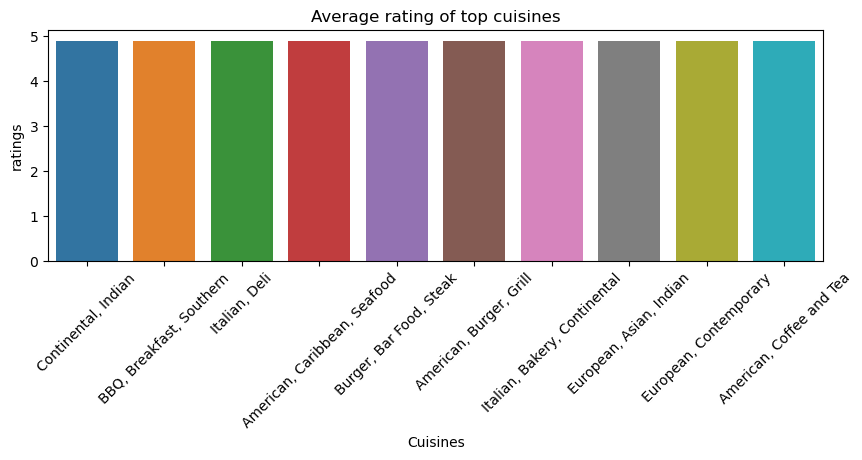

In [103]:
plt.figure(figsize=(10,3))

sns.barplot(x=avg_rating_of_cuisines.head(10).index , y=avg_rating_of_cuisines.head(10).values)
plt.title("Average rating of top cuisines")
plt.xlabel("Cuisines")
plt.xticks(rotation=45)
plt.ylabel("ratings")
plt.show()

In [104]:
avg_rating_of_city = final.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

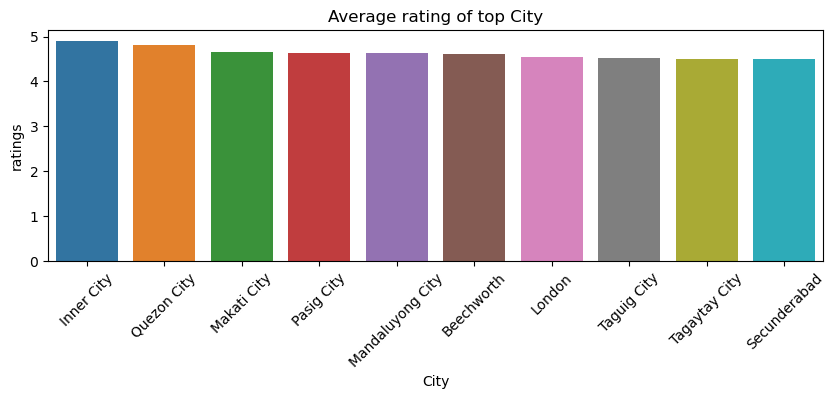

In [105]:
plt.figure(figsize=(10,3))

sns.barplot(x=avg_rating_of_city.head(10).index , y=avg_rating_of_city.head(10).values)
plt.title("Average rating of top City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("ratings")
plt.show()

#### Visualize the relationship between various features and the target variable to gain insights.

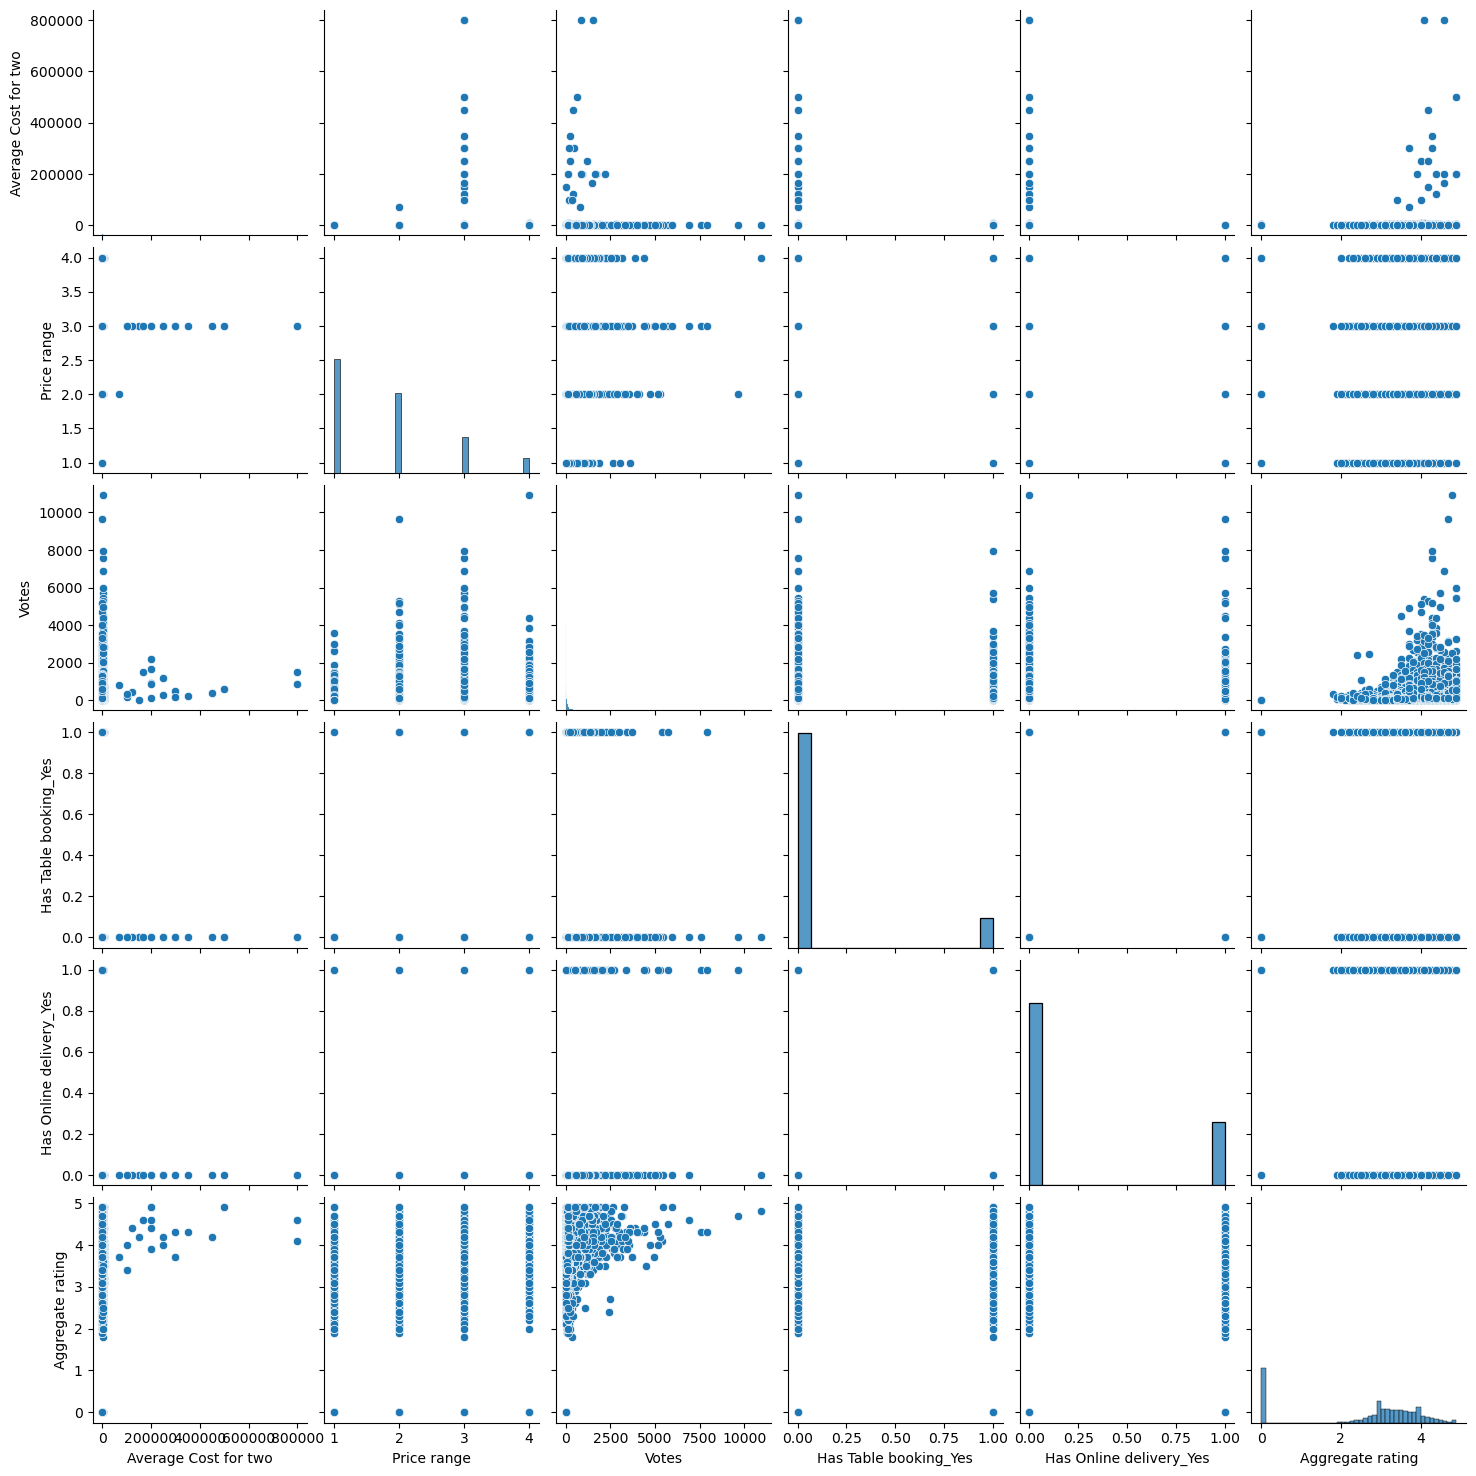

In [107]:
# relationship between features and ratings
cols = ['Average Cost for two' , 'Price range' , 'Votes' , 'Has Table booking_Yes' , 'Has Online delivery_Yes' , 'Aggregate rating']
sns.pairplot(final[cols] , palette='deep')
plt.show()